In [1]:
import networkx as nx 
import numpy as np 
from scipy import sparse 
import sys, os

sys.path.insert(0, '../../../node2vec')
sys.path.insert(0, '../../../residual2vec_')

#diable wandb logging
os.environ['DISABLE_WANDB'] = 'true'

#disable epoch level tqdm
os.environ['DISABLE_TQDM'] = 'true'
# checking if imports working
import node2vecs
from utils import snakemake_utils
from dataset.triplet_dataset import TripletGraphDataset
import seaborn as sns 
import matplotlib.pyplot as plt 

/data/sg/ashutiwa/miniconda3/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using GPU: cuda:0


Using existing file polbooks.gml


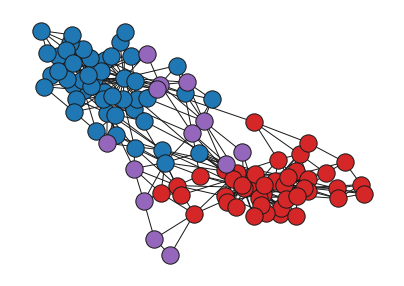

In [4]:

def plot_polbook(adj, grouped_col):
    G = nx.from_scipy_sparse_matrix(adj)
    G = nx.relabel.convert_node_labels_to_integers(
        G, first_label=0, ordering="default"
    )  # first_label is the starting integer label, in this case zero
    nodes = G.nodes(data=True)


    labels, group_ids = np.unique(grouped_col, return_inverse=True)
    deg = np.array(adj.sum(axis=1)).reshape(-1)
    sns.set_style('white')
    sns.set(font_scale=1.2)
    sns.set_style('ticks')
    fig, ax = plt.subplots(figsize=(7,5))

    pos = nx.spring_layout(G)
    node_opts = {"edgecolors": "k", "linewidths": 1.0, "ax":ax}

    nx.draw_networkx_nodes(
        G, pos = pos, nodelist=np.where(group_ids == 0)[0], node_color="tab:blue", **node_opts
    )
    nx.draw_networkx_nodes(
        G, pos = pos, nodelist=np.where(group_ids == 1)[0], node_color="tab:red", **node_opts
    )
    nx.draw_networkx_nodes(
        G, pos = pos, nodelist=np.where(group_ids == 2)[0], node_color="tab:purple", **node_opts
    )
    nx.draw_networkx_edges(G, pos)
    ax.axis("off")
d = snakemake_utils.get_dataset("polbook")
A = snakemake_utils.get_torch_sparse_from_edge_index(d.edge_index, d.get_grouped_col().shape[0]).to_scipy(layout='csr')
plot_polbook(A, d.get_grouped_col())

assigning final weights: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 88612.06it/s]


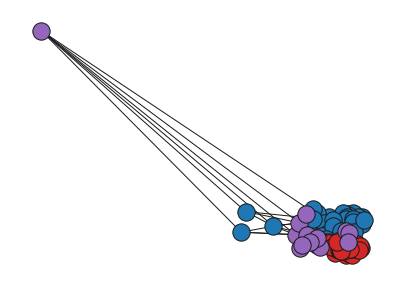

In [5]:
A_hat = snakemake_utils.get_reweighted_graph(A, crosswalk=True, fairwalk=False, 
                                                  group_membership=d.get_grouped_col())

plot_polbook(A_hat, d.get_grouped_col())

In [6]:
A_hat.nonzero()[0].shape, A.nonzero()[0].shape

((876,), (882,))

In [7]:
edge_index = snakemake_utils.get_edge_index_from_sparse_path(A)
r_edge_index = snakemake_utils.get_edge_index_from_sparse_path(A_hat)
edge_index.shape, r_edge_index.shape

(torch.Size([2, 882]), torch.Size([2, 876]))

In [8]:
A_hat.todense()



matrix([[  0.,   1.,   2., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        ...,
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0., 104.],
        [  0.,   0.,   0., ...,   0., 103.,   0.]], dtype=float32)